In [47]:
import pandas as pd
import numpy as np
import pickle
from pandas import ExcelWriter
import ffn
%matplotlib inline

def save_xls(list_dfs, xls_path,sheet_names):
    writer = ExcelWriter(xls_path)
    for n, df in enumerate(list_dfs):
        df.to_excel(writer, sheet_names[n])
    writer.save()
    return

#pull in data from AlphaVantage
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='NXY0VT9AHBRYGKKC',output_format='pandas')

In [48]:
def historical_data(ticker, outsize = "full"):
    #outsize can be compact and full. 
    #compact returns only the latest 100 data points; full 
    #returns the full-length time series of up to 20 years of historical data. The "compact" option is 
    #recommended if you would like to reduce the data size of each API call
    alphavantage_link = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&apikey=NXY0VT9AHBRYGKKC&datatype=csv&outputsize={1}'.format(ticker, outsize)
    df = pd.read_csv(alphavantage_link)
    return df

In [49]:
VAA = ['MSFT','NFLX','AAPL','FB']
Maindf = historical_data("SPY")
Maindf.index = pd.to_datetime(Maindf.timestamp) #set the index as the timestamp
#Maindf.index = pd.to_datetime(Maindf.index) #make the index datetime
Maindf = Maindf[['timestamp','adjusted_close']]
Maindf.columns = ["timestamp","SPY"]

for ticker in VAA:
    temp_df = historical_data(ticker)
    temp_df.index = pd.to_datetime(temp_df.timestamp) #set the index as the timestamp
    temp_df = temp_df[['adjusted_close']]
    temp_df.columns = [ticker]
    Maindf = Maindf.join(temp_df, how = "left")

Maindf.dropna(inplace = True)
Maindf = Maindf.sort_index()


In [50]:
data = Maindf[['SPY','MSFT','NFLX','AAPL','FB']]
perf = data.calc_stats()

C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2054: RuntimeWarning: invalid value encountered in minimum
  negative_returns = np.minimum(returns, 0.)
C:\Users\scheng\AppData\Local\Continuum\anaconda3\lib\site-packages\ffn\core.py:2056: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


In [60]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

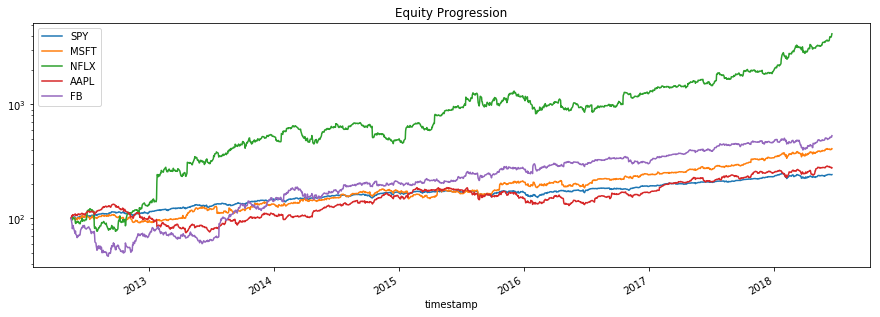

In [61]:
perf.plot(logy = True)

In [52]:
perf.display()

Stat                 SPY         MSFT        NFLX        AAPL        FB
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2012-05-18  2012-05-18  2012-05-18  2012-05-18  2012-05-18
End                  2018-06-20  2018-06-20  2018-06-20  2018-06-20  2018-06-20
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         141.94%     308.26%     4070.98%    177.37%     431.65%
Daily Sharpe         1.23        1.14        1.48        0.81        0.93
Daily Sortino        1.96        1.93        2.86        1.33        1.67
CAGR                 15.62%      25.99%      84.54%      18.24%      31.57%
Max Drawdown         -13.01%     -18.05%     -36.77%     -43.80%     -53.63%
Calmar Ratio         1.20        1.44        2.30        0.42        0.59

MTD                  2.55%       3.39%       18.56%      0.02%       5.99%
3m                   2.55%       10.21%      31.29%      7.07%       20.88%
6m      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010410128>,
      dtype=object)

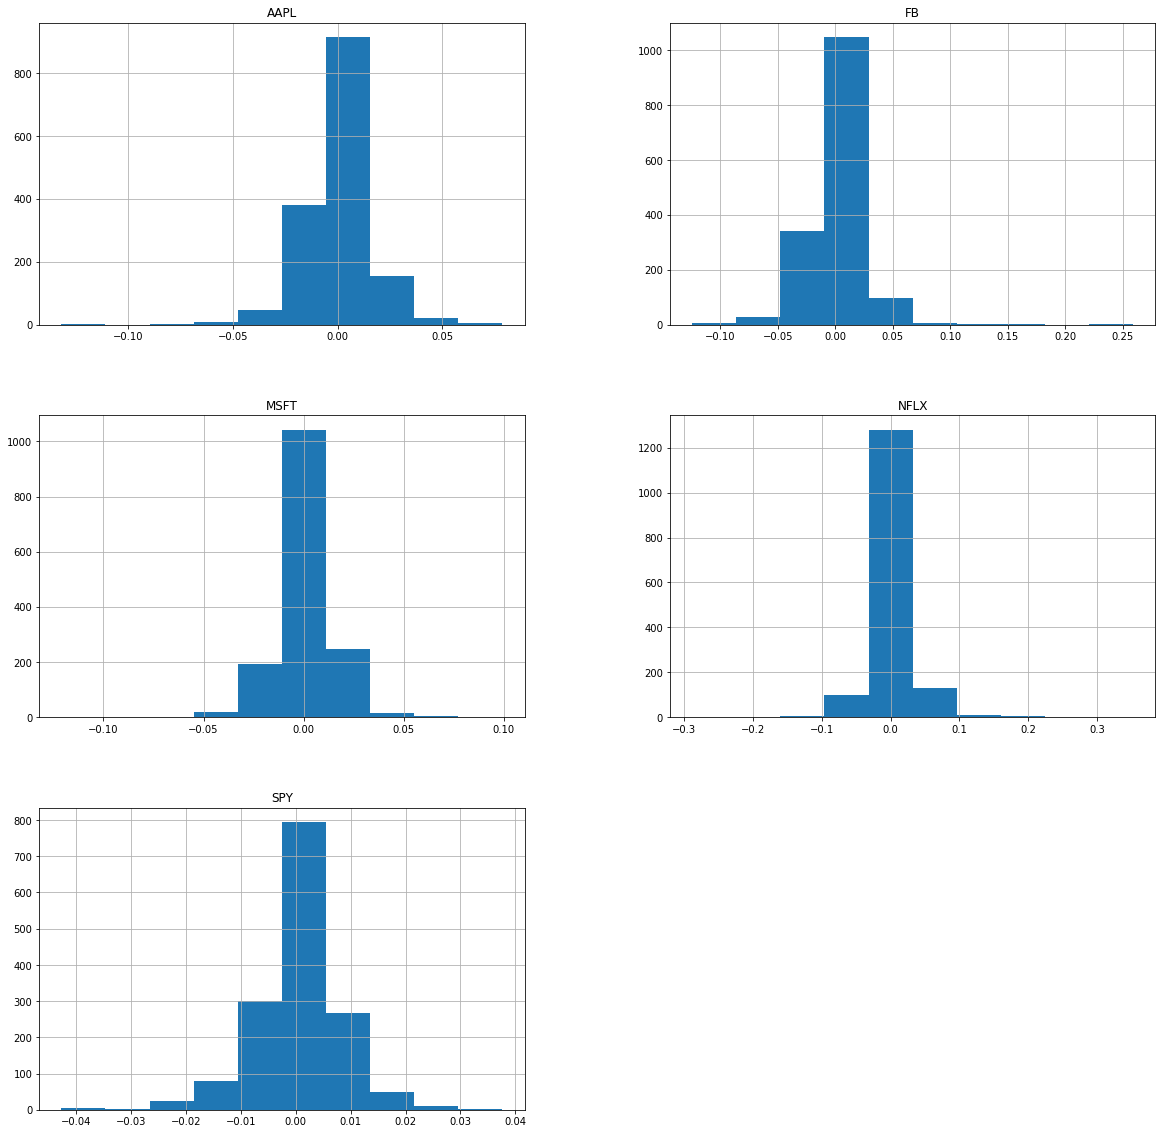

In [62]:
returns = data.to_log_returns().dropna()
returns.hist(figsize =(20,20))

In [54]:
returns.corr().as_format('.2f')

,SPY,MSFT,NFLX,AAPL,FB
SPY,1.00,0.65,0.34,0.52,0.37
MSFT,0.65,1.00,0.26,0.37,0.27
NFLX,0.34,0.26,1.00,0.15,0.21
AAPL,0.52,0.37,0.15,1.00,0.24
FB,0.37,0.27,0.21,0.24,1.00


<module 'matplotlib.pyplot' from 'C:\\Users\\scheng\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

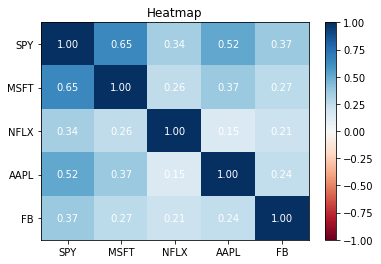

In [55]:
returns.plot_corr_heatmap()